In [ ]:
import numpy as np;
import pandas as pd;
import seaborn as sn;
import matplotlib.pyplot as plt;
import seaborn as sns;

# Reading the data

In [ ]:
#df = pd.read_csv('/kaggle/input/googleplaystore/googleplaystore.csv');

In [ ]:
df = pd.read_csv('C:/Users/nithyaa/Documents/Kaggle/googleplaystore.csv');

Here's a quick overview of the dataset:

Number of rows: 10,841

Number of columns: 13

Column names:

App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.describe()

Sample Data (first 5 rows):

In [ ]:
df.head()

# **Data Cleaning**

1. Convert columns to proper data types, especially: Reviews, Installs, Price to numeric types.

In [ ]:
# 1. Clean 'Reviews': convert to numeric from string
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [ ]:
# 2. Clean 'Installs': remove ',' and '+' then convert to numeric
df['Installs'] = df['Installs'].str.replace('[+,]','',regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [ ]:
# 3. Clean 'Price': remove '$' then convert to float
df['Price'] = df['Price'].str.replace('$','',regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [ ]:
# 4. Clean 'Last Updated' to Datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'],errors='coerce')

In [ ]:
# 5. Clean 'Size': 
    # a.Remove M and k
df['Size'] = df['Size'].str.replace('[Mk]','',regex=True)
    # b. Replace 'Varies with Device' to NaN
df['Size'] = df['Size'].replace('Varies with Device',np.nan)


In [ ]:
    # c. Change the datatype to float
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')

In [ ]:
df.info()

2. Check for **missing values**

In [ ]:
missing_counts = df.isnull().sum();
print(missing_counts)

Remove the rows that has missing values in the fields: rating, installs, category, reviews,type and price

In [ ]:
df = df.dropna(subset=['Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price'])

 Drop rows with missing or malformed 'App' names


In [ ]:
df = df[df['App'].notna()]

In [ ]:
# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [ ]:
print(df.isnull().sum());

# Removing columns that are almost empty

In [ ]:
threshold = len(df) * 0.2
threshold

In [ ]:
df.dropna(thresh=threshold, axis = 1,inplace=True)

In [ ]:
# Rows: 9,366 (from original 10,841 — removed problematic or incomplete entries)

print(df.shape)

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Plot box plots for each feature
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Rating
sns.boxplot(y=df['Rating'], ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title('Box Plot - Rating')

# Reviews
sns.boxplot(y=df['Reviews'], ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Box Plot - Reviews')
axs[0, 1].set_yscale('log')  # Log scale due to large range

# Installs
sns.boxplot(y=df['Installs'], ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Box Plot - Installs')
axs[1, 0].set_yscale('log')

# Price
sns.boxplot(y=df['Price'], ax=axs[1, 1], color='aqua')
axs[1, 1].set_title('Box Plot - Price')
#axs[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

Filling the Type, Current Ver and Android Ver with the most frequently occuring value of the field.

In [ ]:
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

In [ ]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace = True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace = True)

In [ ]:
df.isnull().sum()

In [ ]:
df.head(10)

In [ ]:
df.describe()

# **EDA**

In [ ]:
grp = df.groupby('Category')
x = grp['Installs'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

In [ ]:
plt.figure(figsize = (16,5))
plt.plot(x,'b--',color = 'b')
plt.xticks(rotation = 90)
plt.title('Category Vs Installs')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.show()

In [ ]:
plt.figure(figsize = (16,5))
plt.plot(y,'r--',color = 'r')
plt.xticks(rotation = 90)
plt.title('Category Vs Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

In [ ]:
plt.figure(figsize =(16,5))
plt.plot(z,'g--',color='g');
plt.xticks(rotation =90)
plt.title('Category Vs Reviews')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show();

**KDE plots**

In [ ]:
# Distribution of Price
g = sns.histplot(data=paid_apps,x='Price',kde=True,color='blue',bins=20)

# Add bar labels
for bar in g.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Number of Apps')
plt.tight_layout()
plt.show()


In [ ]:
# Distribution of Content Rating

g = sns.histplot(data=paid_apps,x='Content Rating',kde=True,color='blue',bins=30)

# Add bar labels
for bar in g.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title('Distribution of Content Rating of Apps')
plt.xlabel('Content Rating') 
plt.ylabel('Number of Apps')
plt.tight_layout()
plt.show()



# **Findings**

1. How many apps are there in total?



In [ ]:
app_count = df.shape[0]
print(f"Total number of apps in the store are: {app_count}")

2. What are the unique app categories?

In [ ]:
unique_app_category = df['Category'].unique()
category_count = unique_app_category.size
print(f"There are {category_count} categories in total.")
print(f"Different Categories of App are: {unique_app_category}")

**Most popular Categories of all apps**

In [ ]:
cat_count=df['Category'].value_counts().head(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(cat_count,labels=cat_count.index,autopct='%1.1f%%', startangle=0)

plt.title('Top 10 Categories of the apps')
plt.tight_layout()
plt.show()


3. Which category has the most apps?

In [ ]:
most_common_category = df['Category'].value_counts().idxmax()
count = df['Category'].value_counts().max()

print(f"The most common category is '{most_common_category}' with {count} occurrences.")

4. What is the average app rating overall in each category?


In [ ]:
average_rating_category = df.groupby('Category')['Rating'].mean()

print(f"Average app Rating over different Categories:\n {average_rating_category} ")

5. How many apps are free vs paid?

In [ ]:
free_app_counts = len(df[df['Type'] == 'Free'])
print(f"No of Free apps: {free_app_counts}")

In [ ]:
paid_app_counts = len(df[df['Type'] == 'Paid'])
print(f"No of Paid apps: {paid_app_counts}")

In [ ]:
counts = df['Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=140)

plt.title('Distribution of Free Apps vs Paid Apps')
plt.tight_layout()
plt.show()

6. What’s the average price of paid apps?

In [ ]:
paid_apps = df[df['Price'] > 0]

paid_mean = paid_apps['Price'].mean()
print(f"Average price of paid apps: {paid_mean}")

7. What is the distribution of app ratings?

In [ ]:
df['Rating'].describe()

In [ ]:
#Plotting a histogram to show the Ratings Distribution
df['Rating'].hist(bins=10)
plt.title("Distribution of App Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

8. Which apps have the highest number of reviews?

In [ ]:
max_review = df.loc[df['Reviews'].idxmax()]
max_review_app = max_review['App']

print(f"The app having highest number of reviews is: {max_review_app} with {max_review['Reviews']} counts")

9. What is the average number of installs?

In [ ]:
avg_installs = df['Installs'].mean()
print(f"Average number of installs: {avg_installs}")

# **Data Analysis**

In [ ]:
# Sort and get top 10 most expensive apps
top_10_expensive = paid_apps.sort_values(by='Price', ascending=False).head(10)

# Display selected columns
print("Top 10 Expensive Apps in the Playstore\n")
print(top_10_expensive[['App', 'Category', 'Price', 'Rating', 'Installs']])

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\932094431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(popular_apps,x='Installs',y='App',palette='deep')


<Axes: xlabel='Installs', ylabel='App'>

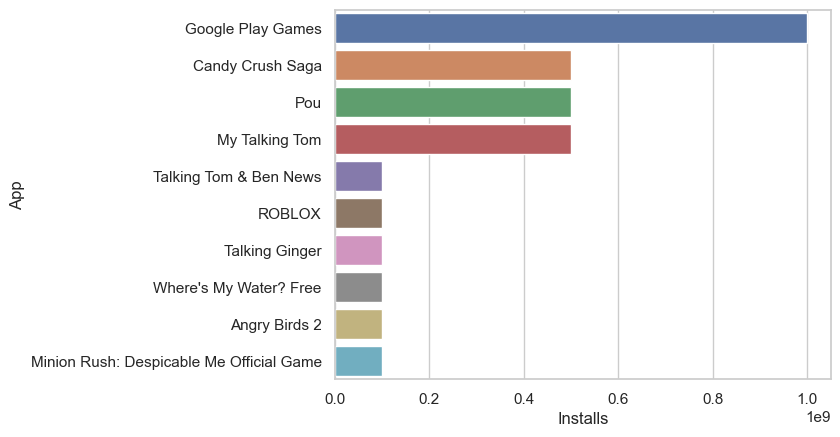

In [465]:
#Drilling Down on Family Category

popular_apps = df[df['Category']=='FAMILY'].sort_values(by='Installs',ascending=False).head(10)

sns.barplot(popular_apps,x='Installs',y='App',palette='deep')

**Top 10 Paid Apps in the Family Category**

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\1540656545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_paid_FAMILY,x='Installs',y='App',palette='deep')


<Axes: xlabel='Installs', ylabel='App'>

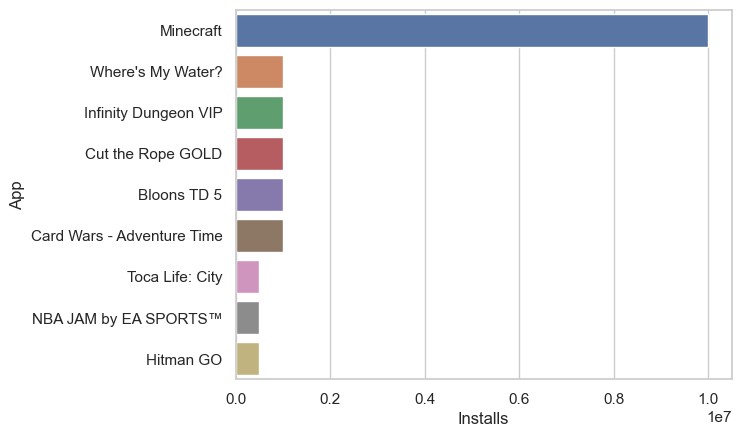

In [ ]:
top_10_paid_FAMILY =df[(df['Category']=='FAMILY') & (df['Type']=='Paid')].sort_values(by='Installs',ascending=False).head(10)

sns.barplot(top_10_paid_FAMILY,x='Installs',y='App',palette='deep')

We will answer a few questions here.
1. Which app categories have the highest average rating?

In [ ]:
# Sort and get top 5 apps with highest avg rating
top_5_category = average_rating_category.sort_values(ascending=False).head(5)

print(f"The top 5 app categories that has highest average rating are:\n {top_5_category}")

2. Which categories have the most installs on average?

In [ ]:
# Sort and get the top 5 most installs on the average
top_5_category_installs = round(df.groupby('Category')['Installs'].mean(),2).sort_values(ascending=False).head(5)

print(f"The top 5 app categories that has highest number of installs are:\n {top_5_category_installs} ")

**Interpretation**

COMMUNICATION has the highest number of installs with 99M, which includes apps like Whatsapp, Facebook Messenger, UC Browser, etc
Next follows SOCIAL with 54M installs having apps like Facebook, Instagram, Snapchat, etc

3. Is there a correlation between rating and number of installs?

In [ ]:
correlation = df['Rating'].corr(df['Installs'])

print(f"Correlation between Rating and Installs : {correlation}")

**Interpretation**

Very weak correlation between Rating and Installs. Which shows that apps with most installs don't necessarily have better ratings. To have a strong correlation, the correlation value should be closer to 1.

We can instead check the correlation between type(free or paid) and Installs. As we are performing correlation calculation between a categorical feature and a numerical feature, we cannot use .corr() function. We can perform the ANOVA statistical test to check the difference in means across groups. This can be done as below:

In [ ]:
from scipy.stats import f_oneway

# Split data into Free and Paid groups
free_installs = df[df['Type'] == 'Free']['Installs']
paid_installs = df[df['Type'] == 'Paid']['Installs']

# Perform one-way ANOVA
anova_result = f_oneway(free_installs, paid_installs)

print(f"ANOVA F-statistic: {anova_result.statistic:.2f}")
print(f"ANOVA p-value: {anova_result.pvalue:.8f}")


As p-value < 0.05, there is a statistically significant difference between installs of Free and Paid apps. Free apps have WAY more installs.
Let's visualize this in a box plot.

In [ ]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Installs', data=df,palette='pastel')
plt.yscale('log')

# Add title and labels
plt.title('Installs across free and paid apps')
plt.xlabel('App Type')
plt.ylabel('Number of Installs(log scale)')
plt.grid(True)
plt.tight_layout()
plt.show()

4. Do paid apps generally have better ratings than free apps?

In [ ]:
free_apps = df[df['Type']=='Free']

free_apps_mean_rating = round(free_apps['Rating'].mean(),3)
paid_apps_mean_rating = round(paid_apps['Rating'].mean(),3)
mean_rating = round(df['Rating'].mean(),3)

print(f"Average rating of free apps: {free_apps_mean_rating}")
print(f"Average rating of paid apps: {paid_apps_mean_rating}")
print(f"Average rating of apps: {mean_rating}")


**Interpretation**

This shows that the free apps, with average rating of 4.186 are rated lower than paid apps with 4.267 average rating.
The paid apps are rated higher than the average score of all apps.

5. Which genres are most common in highly-rated apps (rating > 4.5)?

In [ ]:
high_rated_apps = df[df['Rating']> 4.5]
top_genres = high_rated_apps['Genres'].value_counts().head(10)

print(f"Top 5 Genres that have highly-rated apps with counts are: \n{top_genres}")



In [ ]:
top_genre_df = top_genres.reset_index()
top_genre_df.columns=['Genres','Count']

In [ ]:
# Create the catplot
g = sns.catplot(x='Genres',y='Count',data=top_genre_df, kind='bar',palette='deep',hue='Genres',legend=False)

# Add count labels to bars
ax = g.ax
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xticks(rotation=45)
plt.title('Top Genres in Highly Rated Apps')
plt.tight_layout()
plt.show()


6. Which content ratings (e.g. Everyone, Teen, Mature) have the highest-rated apps?

In [ ]:
top_con_rating = high_rated_apps['Content Rating'].value_counts()

print(f"The content ratings for Highest-rated apps are as follows:\n {top_con_rating}")

**Interpretation**

Looking at the numbers, apps that have 'Everyone' as content ratings have the most highest rated apps with 1581 apps followed by 'Teen' with 200 apps.e
Let's visualize this with a bar chart.

In [ ]:
g= sns.catplot(data=high_rated_apps, x='Content Rating', hue='Content Rating', kind="count", palette='deep', legend=False)

# Add count labels to bars
ax = g.ax
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xticks(rotation=45)
plt.title('Content Ratings in Highly Rated Apps')
#plt.tight_layout()
plt.show()

7. What is the average price of apps per category?

In [ ]:
paid_apps_per_category_avg_mean = paid_apps.groupby('Category')['Price'].agg(np.mean)

print(f"The average price of paid apps per category is: {paid_apps_per_category_avg_mean}")

8. Is there a relationship between price and installs?

In [ ]:
corr = df['Price'].corr(df['Installs'])
corr

In [ ]:
sns.regplot(data=df, x='Price', y='Installs', scatter_kws={'alpha':0.2}, line_kws={"color":"red"})

**Interpretation**

Most apps are clustered under $10 and under 10,000 installs

A few high-priced apps are extreme outliers

Overall trend: higher price → fewer installs

Let's visualize how app updates have changed over the years.

In [ ]:
new_df=df
new_df['Update Year'] = new_df['Last Updated'].dt.year

In [ ]:
# Count number of apps updated per year
updates_per_year = new_df['Update Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=updates_per_year.index, y=updates_per_year.values, palette='deep')

plt.title('Number of Apps Updated per Year')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Let's  visualize app updates over time, broken down by categories like:

✅ App category (e.g. GAME, TOOLS, EDUCATION)

✅ App type (Free vs Paid)


In [ ]:
# Limit to Top 5 most common categories
top_categories = new_df['Category'].value_counts().head(5).index
new_df_top = new_df[new_df['Category'].isin(top_categories)]


In [ ]:
# Group by Year and Category
grouped = new_df_top.groupby(['Update Year', 'Category']).size().reset_index(name='App Count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Update Year', y='App Count', hue='Category', marker='o')
plt.title('Number of App Updates per Year by Top Categories')
plt.ylabel('Number of Apps Updated')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

Family and Game apps have sharp increase in updates from year 2017 to 2018. In contrast, Productivity apps have consistent growth.

9. Do recently updated apps tend to have better ratings?

In [ ]:
rate_corr = df['Last Updated'].corr(df['Rating'])
rate_corr